*basal area*: how much wood does a woodland produce?  
*BAI*: basal area increment (how much additional wood does this area produce)  
*P*: precipitaton (rain)  
*T*: temperature

In [18]:
### Load time series packages
library(tseries)
library(TSA)
library(forecast)

Loading required package: leaps
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-12. For overview type 'help("mgcv-package")'.

Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate

Attaching package: ‘timeDate’

The following objects are masked from ‘package:TSA’:

    kurtosis, skewness

This is forecast 7.1 


Attaching package: ‘forecast’

The following objects are masked from ‘package:TSA’:

    fitted.Arima, plot.Arima

The following object is masked from ‘package:nlme’:

    getResponse



In [9]:
bai <- read.table("http://www.escet.urjc.es/biodiversos/R/BAI.csv", header=T, sep="\t")

In [10]:
head(bai)

,year,BAI,P,T
1,1900.00,41.84,0.47,-0.50
2,1901.00,31.73,0.46,-0.49
3,1902.00,35.75,0.42,-0.46
4,1903.00,42.42,0.40,-0.44
5,1904.00,40.15,0.37,-0.41
6,1905.00,33.44,0.39,-0.38


In [14]:
bai.ts <- ts(data=bai$BAI, start=min(bai$year), frequency=1)

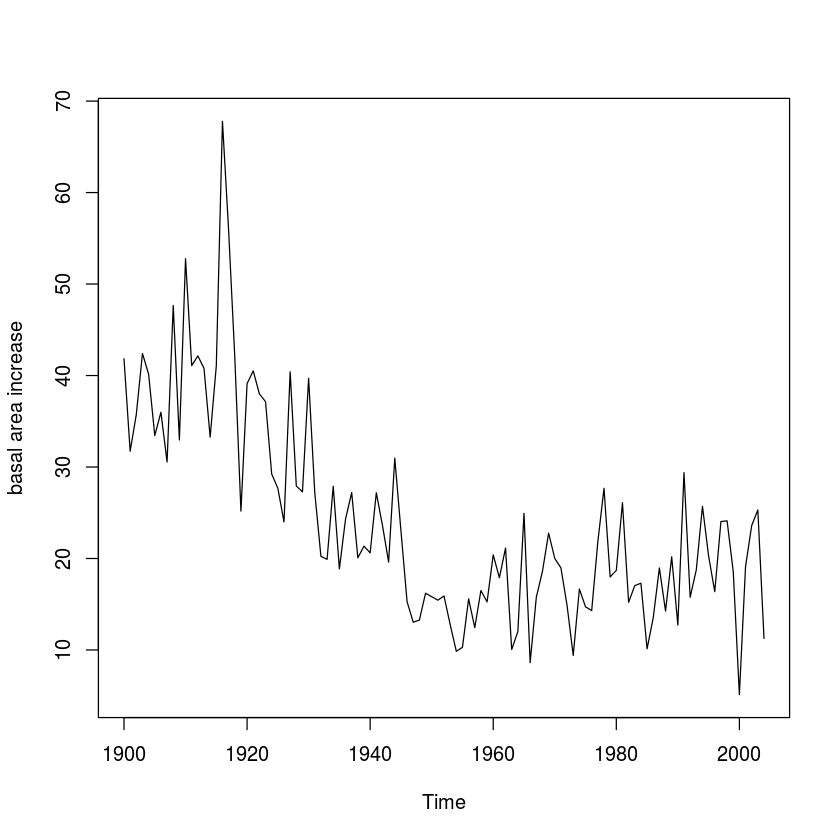

In [16]:
plot(bai.ts, ylab="basal area increase")

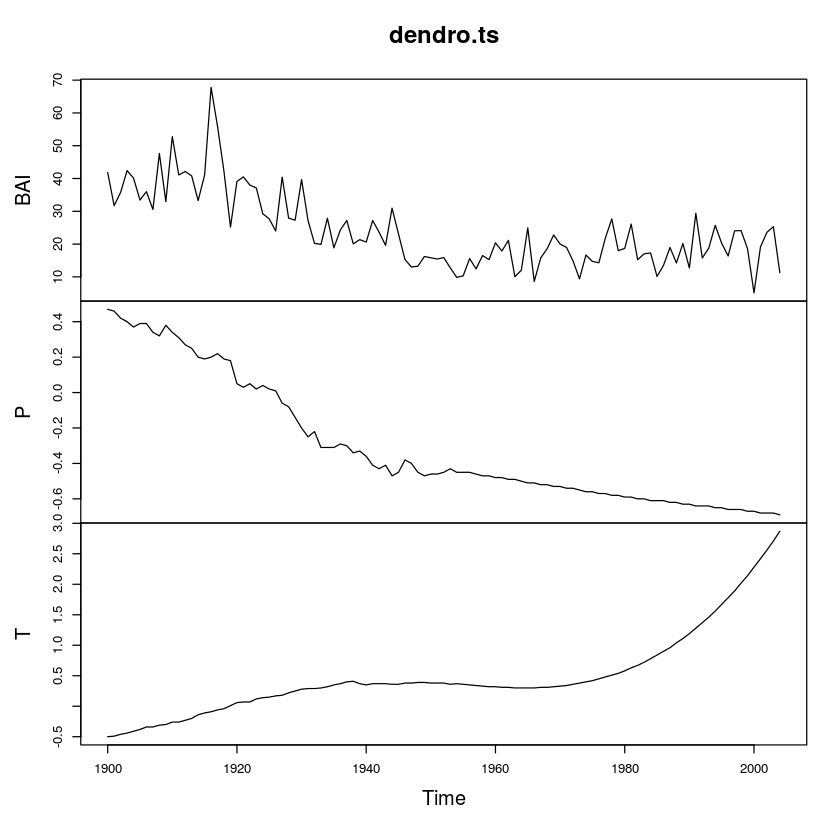

In [40]:
dendro.ts <- ts(data=bai[2:4], start=min(bai$year))
plot(dendro.ts)

# model identification

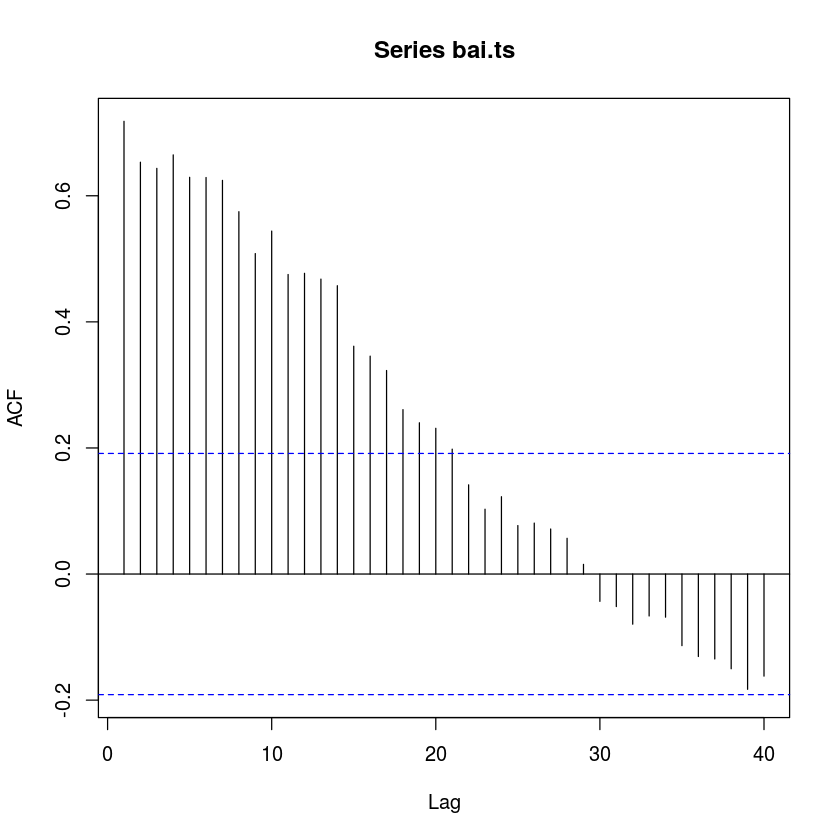

In [42]:
acf(bai.ts, lag=40) # slow decrease -> me might have to integrate first

In [43]:
bai.ts.diff <- diff(bai.ts, 1)

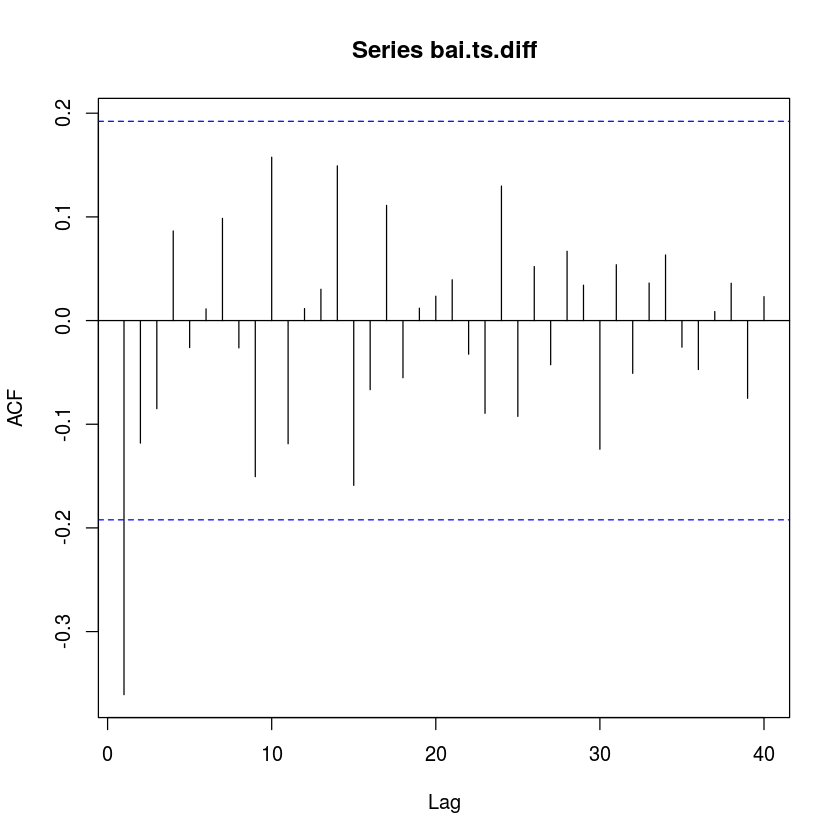

In [44]:
acf(bai.ts.diff, lag=40) # we have success. converted this into a stationary ts

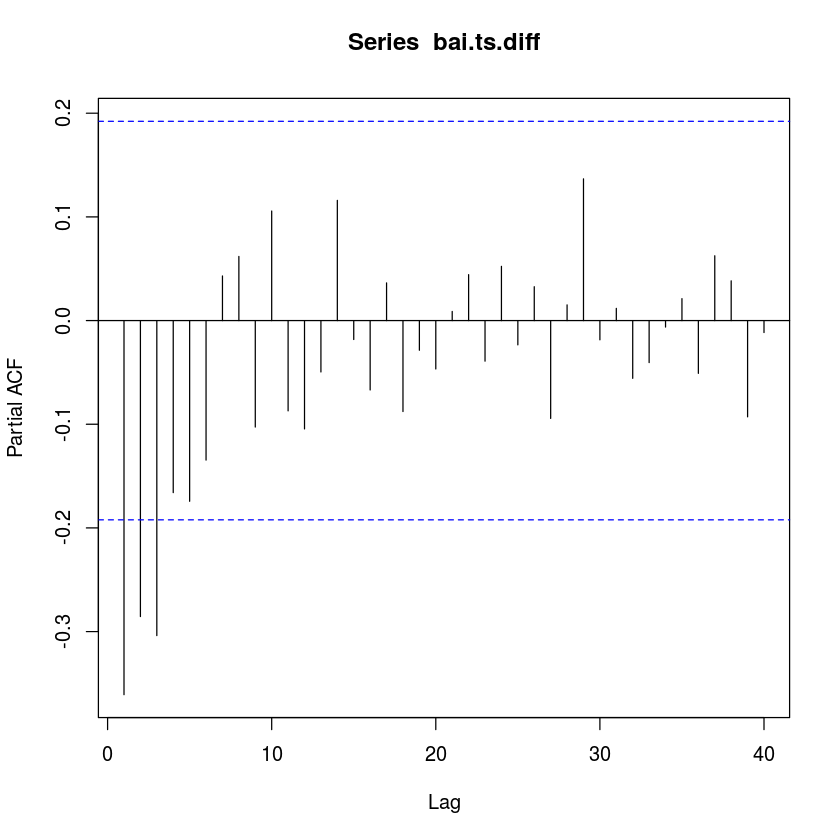

In [46]:
# we don't expect seasonality
# what do acf / pacf tell us?

# acf: one signif. corr
# pacf: expo decrease -> MA(1)
pacf(bai.ts.diff, lag=40)

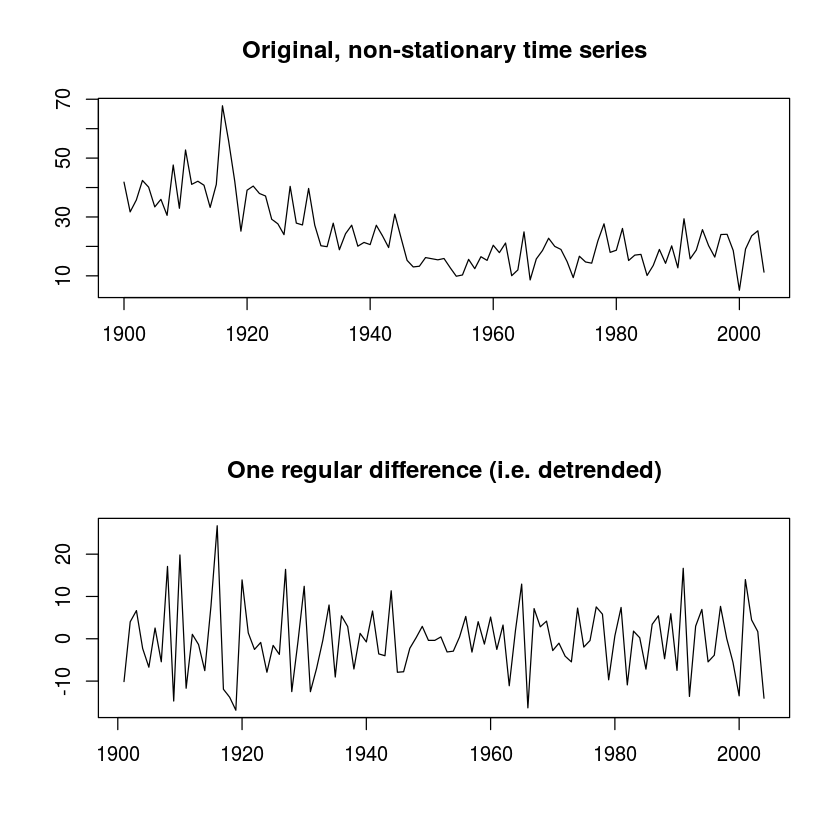

In [28]:
## Time series plot
par(mfcol=c(2,1)) # plot 4 graphs in a 2x2 matrix

plot(bai.ts, ylab="", xlab="")
title(main="Original, non-stationary time series")

# plot(diff(bai.ts, lag=12), ylab="", xlab="")
# title(main="One seasonal difference")

plot(diff(bai.ts, lag=1), ylab="", xlab="")
title(main="One regular difference (i.e. detrended)")

# plot(diff(diff(bai.ts, lag=1), lag=12), ylab="", xlab="")
# title(main="One regular + one\n seasonal difference")

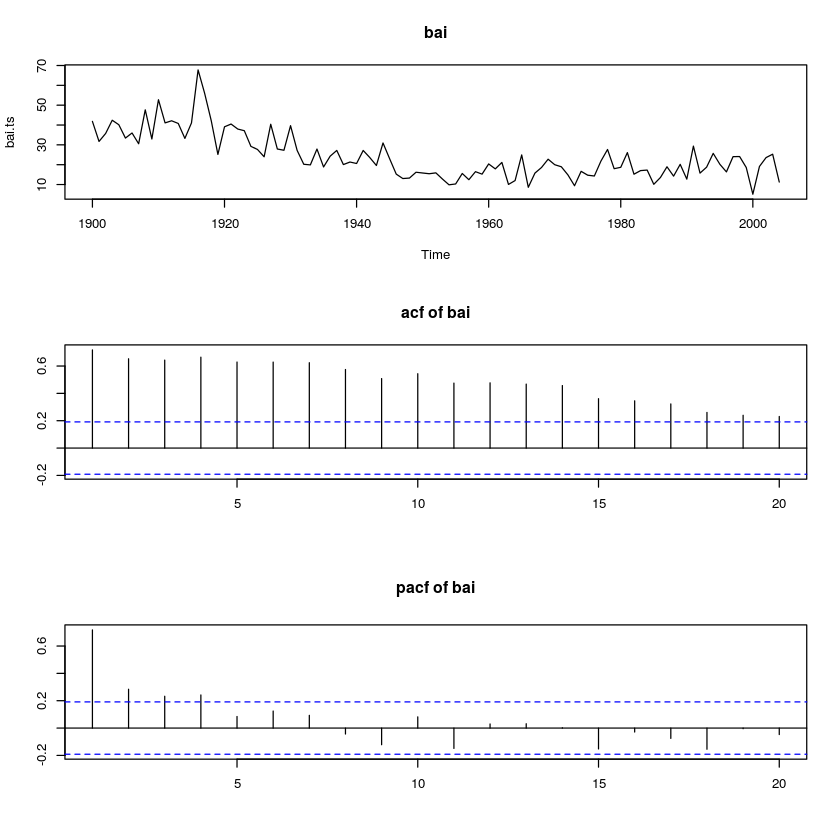

In [39]:
par(mfcol=c(3,1))
plot(bai.ts, main="bai")
acf(bai.ts, ylab="", xlab="", main="acf of bai")
pacf(bai.ts, ylab="", xlab="", main="pacf of bai")

In [20]:
best.arima<-auto.arima(bai.ts, d=1, D=1, max.p=5, max.q=5, max.P=2, max.Q=2)
best.arima # MA(1) w/out seasonal component

Series: bai.ts 
ARIMA(0,1,1)                    

Coefficients:
          ma1
      -0.7356
s.e.   0.0634

sigma^2 estimated as 48.01:  log likelihood=-348.77
AIC=701.53   AICc=701.65   BIC=706.82

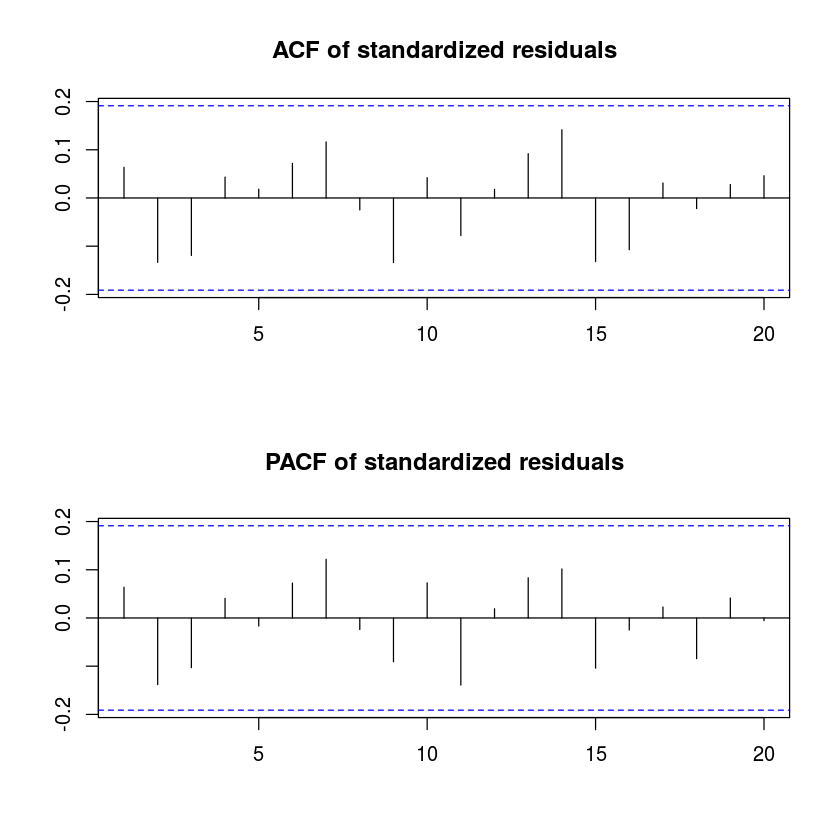

In [29]:
### ACF and PACF of the standardized residuals
par(mfcol=c(2,1))

# We should not see any pattern in the residuals.

acf(rstandard(best.arima), xlab="", ylab="", main="ACF of standardized residuals")
pacf(rstandard(best.arima), xlab="", ylab="", main="PACF of standardized residuals")

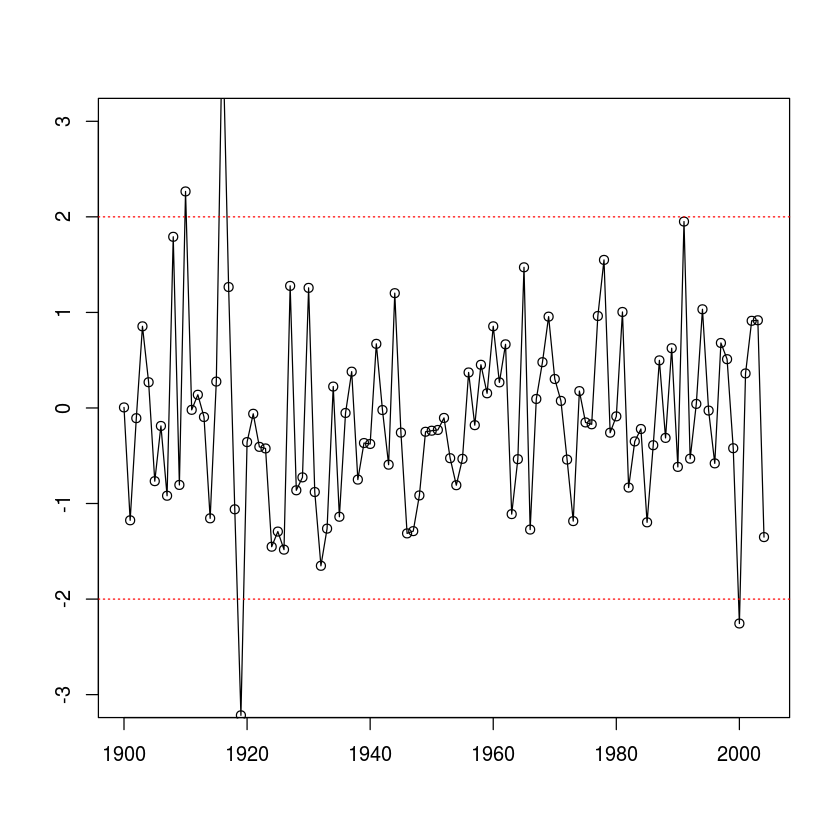

In [30]:
### Plot of standardized residuals

# most residuals are within the SD, so the residuals are normaly distributed
plot(rstandard(best.arima), xlab="", ylab="", main="", type="o", ylim=c(-3,3))
abline(h=2, lty=3, col="red")
abline(h=-2, lty=3, col="red")

In [34]:
# there's another function called plot.Arima, so we'll have to use the namespace
TSA::plot.Arima(best.arima, n.ahead=10, type='l')

ERROR: Error in hasTsp(x): invalid time series parameters specified


In [33]:
class(best.arima)

[1] "ARIMA" "Arima"

In [35]:
str(best.arima)

List of 17
 $ coef     : Named num -0.736
  ..- attr(*, "names")= chr "ma1"
 $ sigma2   : num 48
 $ var.coef : num [1, 1] 0.00402
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr "ma1"
  .. ..$ : chr "ma1"
 $ mask     : logi TRUE
 $ loglik   : num -349
 $ aic      : num 702
 $ arma     : int [1:7] 0 1 0 0 1 1 0
 $ residuals: Time-Series [1:105] from 1900 to 2004: 0.0418 -8.1438 -0.7386 5.9214 1.8693 ...
 $ call     : language auto.arima(x = structure(list(x = structure(c(41.84, 31.73, 35.75, 42.42,  40.15, 33.44, 35.99, 30.56, 47.66, 32.96, 52.77, 41.09, 42.15, 40.79, 33.27,  ...
 $ series   : chr "bai.ts"
 $ code     : int 0
 $ n.cond   : int 0
 $ nobs     : int 104
 $ model    :List of 10
  ..$ phi  : num(0) 
  ..$ theta: num -0.736
  ..$ Delta: num 1
  ..$ Z    : num [1:3] 1 0 1
  ..$ a    : num [1:3] -14.04 6.89 25.31
  ..$ P    : num [1:3, 1:3] 0.00 0.00 -6.11e-21 0.00 0.00 ...
  ..$ T    : num [1:3, 1:3] 0 0 1 1 0 0 0 0 1
  ..$ V    : num [1:3, 1:3] 1 -0.736 0 -0.736 0.541 ...


# model fitting

In [57]:
arima.dendro <- arima(bai.ts, order=c(0,1,1))

In [58]:
arima.dendro


Call:
arima(x = bai.ts, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.7356
s.e.   0.0634

sigma^2 estimated as 47.55:  log likelihood = -348.77,  aic = 699.53

In [49]:
# we could add a regression b/c there's collection with rain and temperature

In [55]:
arima.dendroreg <- arima(bai.ts, order=c(0,1,1), xreg=bai$P)

In [56]:
arima.dendroreg


Call:
arima(x = bai.ts, order = c(0, 1, 1), xreg = bai$P)

Coefficients:
          ma1     xreg
      -0.8022  16.0790
s.e.   0.0740  10.8924

sigma^2 estimated as 46.76:  log likelihood = -348.03,  aic = 700.06

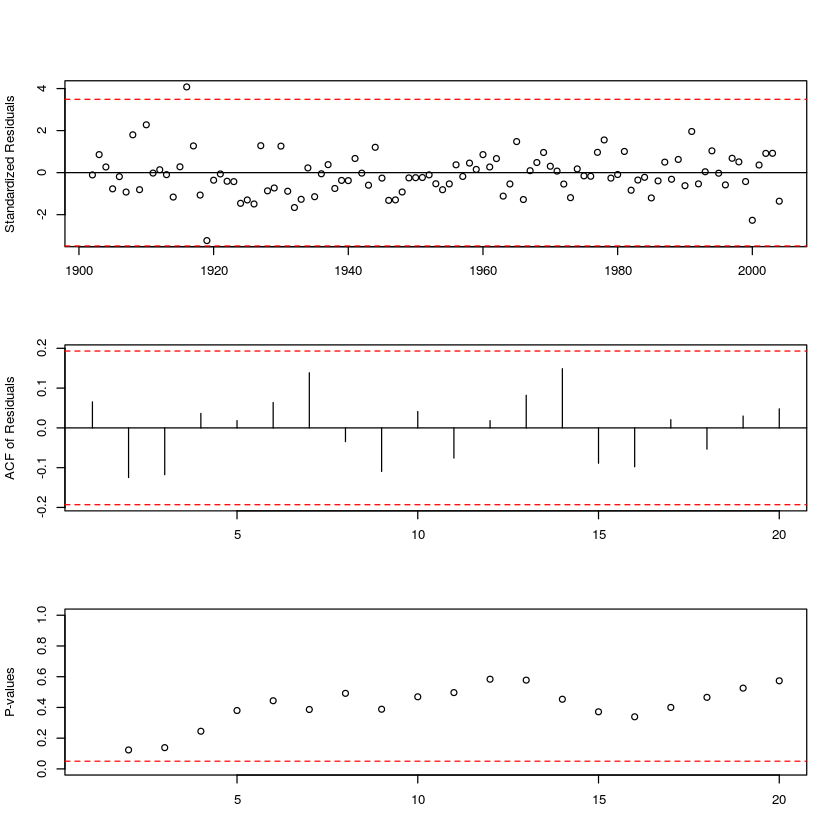

In [59]:
tsdiag(arima.dendro)

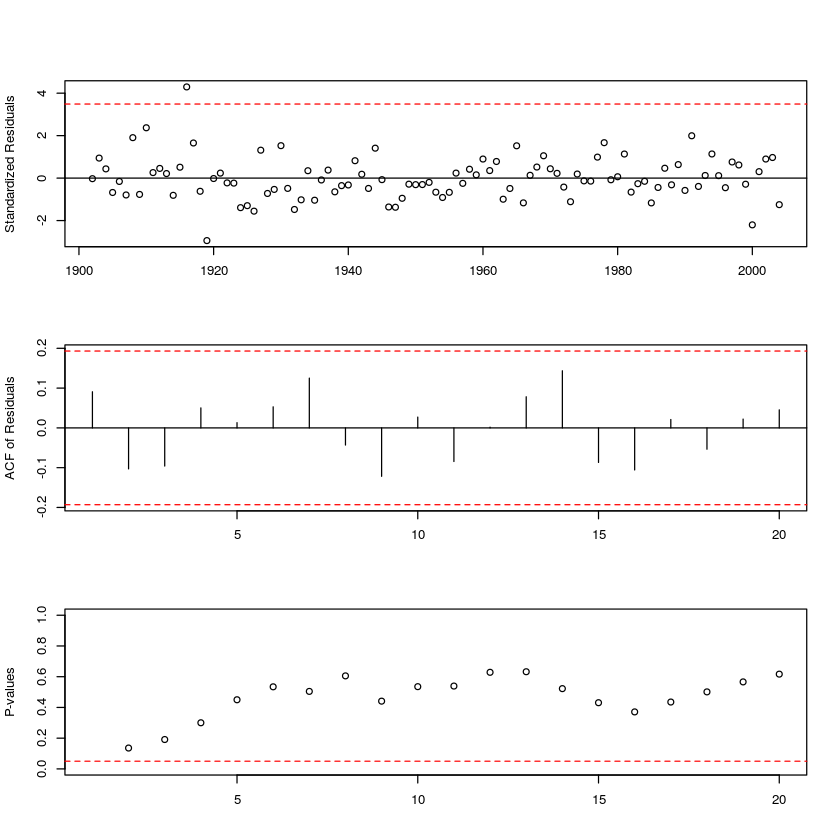

In [60]:
tsdiag(arima.dendroreg)

In [61]:
# forecasting

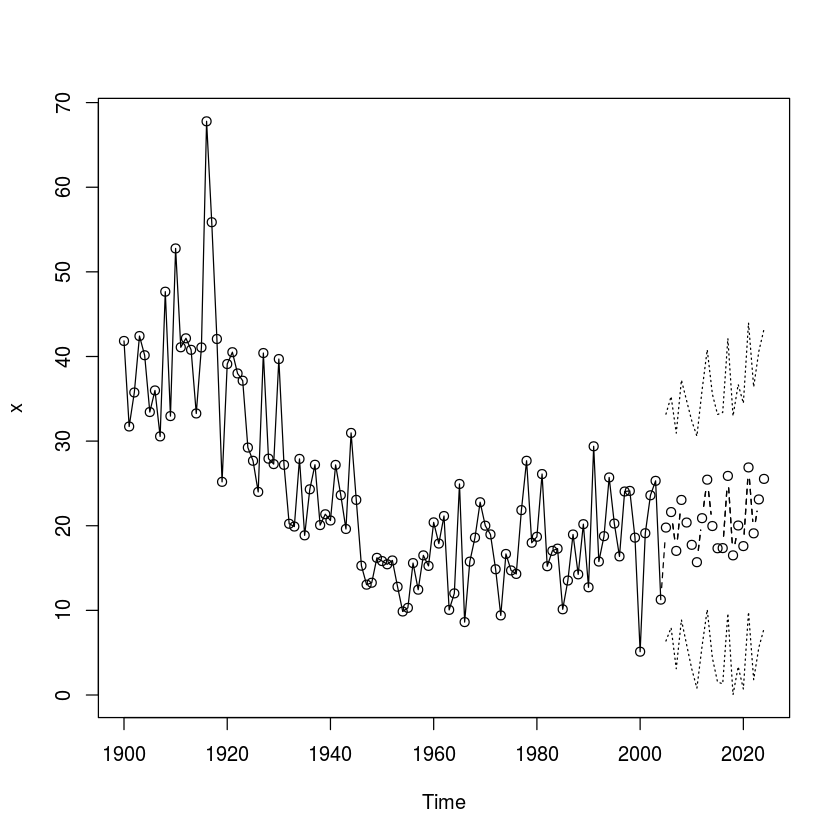

In [62]:
# we have no idea about future precipitation
# we simply make it up, but we could use another model for that

TSA::plot.Arima(arima.dendroreg, n.ahead = 20, newxreg=rnorm(20, mean=-0.5, sd=0.25))